# Statistical Treatment for Retail Datasets

## Data Prepocessing

In [1]:
# import library

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
# read dataset

df = pd.read_csv('dataset/nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**A reference on the trickier fields:**
- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

**Note**
- Many sales occur with a nonsensically small dollar amount:$0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [3]:
# melihat size dataframe

df.shape

(84548, 22)

In [4]:
# melihat missing value

df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [5]:
# melihat tipe data setiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
# melihat summary setiap kolom

df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
# menghapus data yang tidak diperlukan

df.drop(['Unnamed: 0', 'EASE-MENT', 'ZIP CODE', 'APARTMENT NUMBER'], axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
df.shape

(84548, 18)

In [9]:
# melihat apakah ada duplikat

df.duplicated().sum()

767

In [10]:
# menghapus duplikat

df.drop_duplicates(inplace=True)

In [11]:
df.shape

(83781, 18)

In [12]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [13]:
# menjumlahkan value kolom borough, tax class at present, tax class at time of sale

for col in ['BOROUGH', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']:
    print(df[col].value_counts())

4    26548
3    23841
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64
1     38329
2     30721
4      5958
2A     2492
2C     1907
1A     1440
1B     1208
2B      799
        738
1C      186
3         3
Name: TAX CLASS AT PRESENT, dtype: int64
1    41199
2    36476
4     6103
3        3
Name: TAX CLASS AT TIME OF SALE, dtype: int64


In [14]:
# mengubah tipe data menjadi category

categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT'
                , 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']

for col in categoricals:
    df[col] = df[col].astype('category')

In [15]:
# mengubah tipe data menjadi floats

floats = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in floats:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83781 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         83781 non-null  category
 1   NEIGHBORHOOD                    83781 non-null  category
 2   BUILDING CLASS CATEGORY         83781 non-null  category
 3   TAX CLASS AT PRESENT            83781 non-null  category
 4   BLOCK                           83781 non-null  int64   
 5   LOT                             83781 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83781 non-null  category
 7   ADDRESS                         83781 non-null  object  
 8   RESIDENTIAL UNITS               83781 non-null  int64   
 9   COMMERCIAL UNITS                83781 non-null  int64   
 10  TOTAL UNITS                     83781 non-null  int64   
 11  LAND SQUARE FEET                57727 non-null  float64 
 12  GROSS SQUARE FEET 

In [17]:
# menghapus kolom address

df.drop(['ADDRESS'], axis=1, inplace=True)

In [18]:
# split sale date into month and year

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df.drop('SALE DATE', axis=1, inplace=True)

In [19]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE MONTH                            0
SALE YEAR                             0
dtype: int64

In [20]:
# mengisi missing value dengan nilai tengah

df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median(),inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median(),inplace=True)
df['SALE PRICE'].fillna(df['SALE PRICE'].median(),inplace=True)

In [21]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE MONTH                        0
SALE YEAR                         0
dtype: int64

In [22]:
df.shape

(83781, 18)

# Measure of Central Tendency: Mean

In [23]:
# menghitung rata-rata seluruh kolom

mean_df = df.mean()
mean_df

C:\Users\ASUS\AppData\Local\Temp/ipykernel_79072/1497584014.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_df = df.mean()


BLOCK                4.242895e+03
LOT                  3.761344e+02
RESIDENTIAL UNITS    2.000024e+00
COMMERCIAL UNITS     1.836813e-01
TOTAL UNITS          2.213557e+00
LAND SQUARE FEET     3.374314e+03
GROSS SQUARE FEET    3.170696e+03
SALE PRICE           1.154220e+06
dtype: float64

In [134]:
# menghitung rata-rata SALE PRICE

mean_price = statistics.mean(df['SALE PRICE'])
print('Mean of Sale Price: ',mean_price)

Mean of Sale Price:  1154219.9513254794


# Measure of Central Tendency: Median

In [25]:
# menghitung median seluruh kolom

median_df = df.median()
median_df

C:\Users\ASUS\AppData\Local\Temp/ipykernel_79072/1850778972.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_df = df.median()


BLOCK                  3318.0
LOT                      50.0
RESIDENTIAL UNITS         1.0
COMMERCIAL UNITS          0.0
TOTAL UNITS               1.0
LAND SQUARE FEET       2314.0
GROSS SQUARE FEET      1680.0
SALE PRICE           533000.0
dtype: float64

In [137]:
# menghitung median TOTAL UNITS

median_total = statistics.median(df['TOTAL UNITS'])
print('Median of Total Units:', median_total)

Median of Total Units: 1


# Measure of Central Tendency: Modus

In [27]:
# mencari modus seluruh kolom

modus_df = df.mode()
modus_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,1,0,1,2314.0,1680.0,0,1,R4,533000.0,6,2017


In [139]:
# mencari modus di kolom COMMERCIAL UNITS

modus_building = statistics.mode(df['BUILDING CLASS AT PRESENT'])
print('Mode of Building Class at Present: ', modus_building)

Mode of Building Class at Present:  D4


# Measure of Spread: Range

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83781 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         83781 non-null  category
 1   NEIGHBORHOOD                    83781 non-null  category
 2   BUILDING CLASS CATEGORY         83781 non-null  category
 3   TAX CLASS AT PRESENT            83781 non-null  category
 4   BLOCK                           83781 non-null  int64   
 5   LOT                             83781 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83781 non-null  category
 7   RESIDENTIAL UNITS               83781 non-null  int64   
 8   COMMERCIAL UNITS                83781 non-null  int64   
 9   TOTAL UNITS                     83781 non-null  int64   
 10  LAND SQUARE FEET                83781 non-null  float64 
 11  GROSS SQUARE FEET               83781 non-null  float64 
 12  YEAR BUILT        

In [30]:
# menghitung range semua kolom yang bertipe data int dan float

range_block = df['BLOCK']
range_block = np.ptp(range_block)

range_lot = df['LOT']
range_lot = np.ptp(range_lot)

range_residential = df['RESIDENTIAL UNITS']
range_residential = np.ptp(range_residential)

range_commercial = df['COMMERCIAL UNITS']
range_commercial = np.ptp(range_commercial)

range_total = df['TOTAL UNITS']
range_total = np.ptp(range_total)

range_sale = df['SALE PRICE']
range_sale = np.ptp(range_sale)

range_block, range_lot, range_residential, range_commercial, range_total, range_sale

(16321, 9105, 1844, 2261, 2261, 2210000000.0)

# Measure of Spread: Variance

In [31]:
# menghitung varian seluruh kolom

var_df = df.var()
var_df

C:\Users\ASUS\AppData\Local\Temp/ipykernel_79072/4115638467.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_df = df.var()


BLOCK                1.273656e+07
LOT                  4.330020e+05
RESIDENTIAL UNITS    2.745421e+02
COMMERCIAL UNITS     7.355952e+01
TOTAL UNITS          3.526113e+02
LAND SQUARE FEET     1.189844e+09
GROSS SQUARE FEET    8.180443e+08
SALE PRICE           1.086277e+14
dtype: float64

In [140]:
# menghitung varian SALE PRICE

var_price = statistics.variance(df['SALE PRICE'])
print('Variance of Sale Price:', var_price)

Variance of Sale Price: 108627717142494.28


# Measure of Spread: Standard Deviation

In [33]:
# menghitung standar deviasi seluruh kolom

sd_df = df.std()
sd_df

C:\Users\ASUS\AppData\Local\Temp/ipykernel_79072/485777478.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd_df = df.std()


BLOCK                3.568832e+03
LOT                  6.580289e+02
RESIDENTIAL UNITS    1.656931e+01
COMMERCIAL UNITS     8.576684e+00
TOTAL UNITS          1.877795e+01
LAND SQUARE FEET     3.449411e+04
GROSS SQUARE FEET    2.860147e+04
SALE PRICE           1.042246e+07
dtype: float64

In [141]:
# menghitung standar deviasi LAND SQUARE FEET
sd_land = statistics.stdev(df['LAND SQUARE FEET'])
print('Standard Deviation of Land Square Feet:', sd_land)

Standard Deviation of Land Square Feet: 34494.10819908106


# Probability Distribution

In [35]:
# import library

import seaborn as sns
sns.set(color_codes=True)   #settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)})

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BOROUGH', ylabel='Density'>

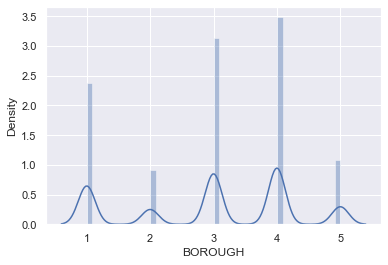

In [36]:
# melihat distribusi data BOROUGH

sns.distplot(df['BOROUGH'])

In [37]:
# groupby kolom sesuai valuenya

df_borough = df['BOROUGH'].groupby(df['BOROUGH']).value_counts()

In [38]:
df_borough.head()

BOROUGH   
1        1    18102
         2        0
         3        0
         4        0
         5        0
Name: BOROUGH, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

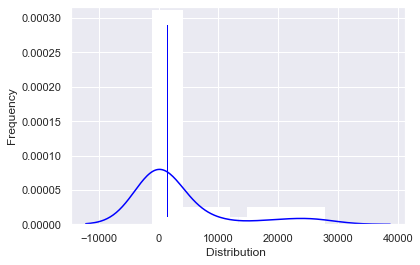

In [39]:
# melihat distribusi BOROUGH sesuai kategori borough

ax = sns.distplot(df_borough,
                  bins=10,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

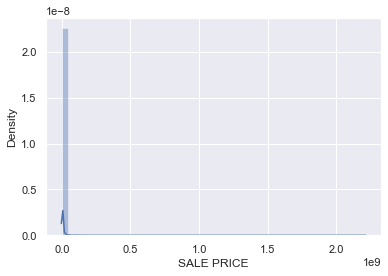

In [40]:
# melihat distribusi data SALE PRICE

sns.distplot(df['SALE PRICE'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT', ylabel='Density'>

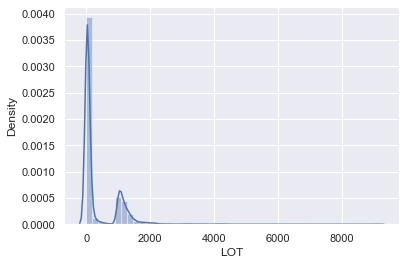

In [41]:
# melihat distribusi data LOT

sns.distplot(df['LOT'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLOCK', ylabel='Density'>

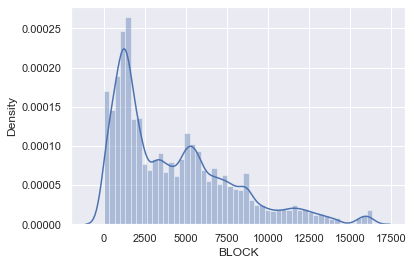

In [42]:
# melihat distribusi data BLOCK

sns.distplot(df['BLOCK'])

# Confidence Intervals

In [114]:
# menghapus data sale price yang mempunyai value 0

df_CI = df[df['SALE PRICE'] != 0]
df_CI.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,28,3,31,4616.0,18690.0,1900,2,C7,533000.0,12,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,16,1,17,2212.0,7803.0,1900,2,C7,533000.0,12,2016
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9,2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11,2016


In [121]:
# groupby kolom borough dengan mean, std, dan size

df_CI.groupby('BOROUGH').aggregate({'SALE PRICE':
                                    [np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        2.765601e+06  2.154141e+07  18102
2        8.047933e+05  3.223718e+06   5168
3        1.280830e+06  4.818740e+06  15657
4        6.757716e+05  2.689265e+06  26548
5        5.406566e+05  1.618620e+06   8296

In [142]:
# menghitung nilai standar error

mean_1 = 2.76560
std_1 = 2.15414
size_1 = 18102
z = 1.96

se_1 = std_1 / np.sqrt(size_1)
print('Standard error of Manhattan:', se_1)

Standard error of Manhattan: 0.016010711976680518


In [143]:
# menghitung confidence interval

lcb = mean_1 - z* se_1  #lower limit of the CI
ucb = mean_1 + z* se_1  #upper limit of the CI
print('Lower Limit of CI:', lcb)
print('Upper Limit of CI:', ucb)

Lower Limit of CI: 2.7342190045257064
Upper Limit of CI: 2.7969809954742937


# Hypothesis Testing

In [129]:
# import library

import statsmodels.api as sm

**Asumsi**
- Data berdistribusi normal, iid
- alpha = 5%

**Hipotesis**
- *H0*: Sale price Bronx (2) > Sale price Brooklyn (3)
- *H1*: Sale price Bronx (2) < Sale price Brooklyn (3)

**Kriteria Uji**
- Tolak H0 apabila p-value < 0.05(alpha)

In [130]:
b2 = df[df['BOROUGH'] == 2]
b3 = df[df['BOROUGH'] == 3]


n2 = len(b2)
mu2 = b2["SALE PRICE"].mean()
sd2 = b2["SALE PRICE"].std()

n3 = len(b3)
mu3 = b3["SALE PRICE"].mean()
sd3 = b3["SALE PRICE"].std()

print(n2, mu2, sd2)
print(n3, mu3, sd3)

6994 594677.118387189 2793509.0485762
23841 841153.952812382 3952070.09080414


In [131]:
sm.stats.ztest(b2["SALE PRICE"].dropna(), 
               b3["SALE PRICE"].dropna(),
               alternative='two-sided')

(-4.8709242915628606, 1.1107739883048282e-06)

**Kesimpulan**

Karena p-value yang didapat adalah 1.1107739883048282e-06 > 0.05, maka H0 diterima dan H1 ditolak, yang berarti **Sale price on Boronx > Sale price on Brooklyn**

# Overall Analysis
- Rata - rata dari setiap kolom dataframe adalah sebagai berikut
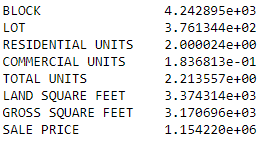

- Nilai tengah dari setiap kolom dataframe adalah sebagai berikut:
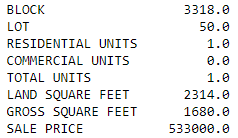

- Modus dari Commercial Units adalah 4
- Range dari Total Units adalah 2261
- Varian dari setiap kolom dataframe adalah sebagai berikut:
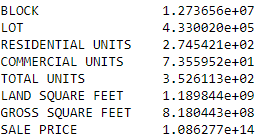

- Standar deviasi dari setiap kolom dataframe adalah sebagai berikut:
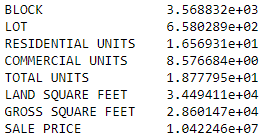

- Berdasarkan hypothesis testing Sale price di Boronx lebih besar daripada Sale price di Brooklyn